In [242]:
import numpy as np
import matplotlib.pyplot as plt
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))

In [107]:
state_weather = np.array(("sunny", "cloudy", "rainy"))

**Задание 1.** Выберите произвольное начальное состояние и смоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. Результат моделирования (массив размера 20000) запишите в переменную `states`.

In [157]:
states = np.full(20000, state_weather[1])

matrix = np.empty(shape = (3,3))
for i in range (3):
    for j in range(3):
        matrix[i,j] = np.sum(transition_matrix[i,:(j+1)])

def index(weather):
    if (weather == state_weather[0]):
        return 0
    elif (weather == state_weather[1]):
        return 1
    else:
        return 2

a = np.random.rand()
if (a < 1/3):
    start_weather = state_weather[0]
elif (a > 2/3):
    start_weather = state_weather[2]
else:
    start_weather = state_weather[1]

n_last_weather = index(start_weather)
a = np.random.rand()
if (a < matrix[n_last_weather, 0]):
    states[0] = state_weather[0]
elif (a > matrix[n_last_weather, 1]):
    states[0] = state_weather[2]
else:
    states[0] = state_weather[1]

for i in range (1, 20000):
    n_last_weather = index(states[i-1])
    a = np.random.rand()
    if (a < matrix[n_last_weather, 0]):
        states[i] = state_weather[0]
    elif (a > matrix[n_last_weather, 1]):
        states[i] = state_weather[2]
    else:
        states[i] = state_weather[1]
        
print(states)

['sunny' 'sunny' 'sunny' ... 'sunny' 'sunny' 'cloudy']


**Задание 2.** На основе массива `states` рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве `states[:n]` для `n`, возрастающих от 1 до 20000. На одном рисунке покажите 3 графика: по оси х откладывайте `n`, по у - частоту для каждого из трех типов погоды. Должна получиться примерно следующая картинка:
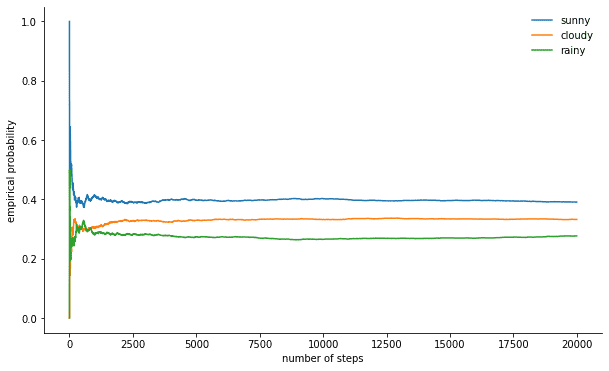

In [158]:
sunny = np.empty(20000, dtype = "float")
cloudy = np.empty(20000, dtype = "float")
rainy = np.empty(20000, dtype = "float")
for n in range (20000):
    sunny[n] = (np.count_nonzero(states[:(n+1)] == "sunny"))/(n+1)
    cloudy[n] = (np.count_nonzero(states[:(n+1)] == "cloudy"))/(n+1)
    rainy[n] = (np.count_nonzero(states[:(n+1)] == "rainy"))/(n+1)

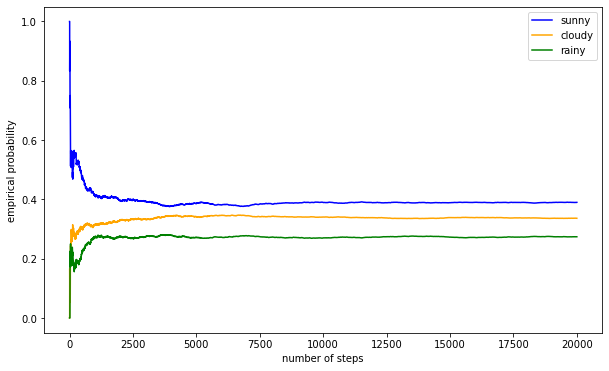

In [159]:
X = np.array([i for i in range(20000)], dtype = "int")

plt.figure(figsize=(10, 6))

plt.plot(X, sunny, c = "blue", label = "sunny")
plt.plot(X, cloudy, c = "orange", label = "cloudy")
plt.plot(X, rainy, c = "green", label = "rainy")
plt.legend(loc = 'upper right')
plt.xlabel("number of steps")
plt.ylabel("empirical probability")
plt.show()

**Задание 3.** Как следует из картинки, частоты сходятся к некоторым стационарным значениям. Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей (transition_matrix), а вектор π - искомая стационарная плотность. Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

In [243]:
transition_matrix_T = np.empty((3,3))
for i in range(3):
    for j in range(3):
        transition_matrix_T[i,j] = transition_matrix[i,j]
transition_matrix_T = transition_matrix_T.transpose()
A = transition_matrix_T
for i in range(3):
    A[i,i] = A[i,i] - 1
for i in range(3):
    A[2,i] = 1
b = np.zeros(3)
b[2] = 1
Pi = np.linalg.solve(A, b)
print(Pi)

print(transition_matrix)
k = int(input())
M = np. linalg. matrix_power(transition_matrix, k)
print(M)

[0.38888889 0.33333333 0.27777778]
[[0.6 0.3 0.1]
 [0.3 0.4 0.3]
 [0.2 0.3 0.5]]
10
[[0.38894132 0.33333333 0.27772535]
 [0.38887141 0.33333333 0.27779525]
 [0.38883646 0.33333333 0.27783021]]


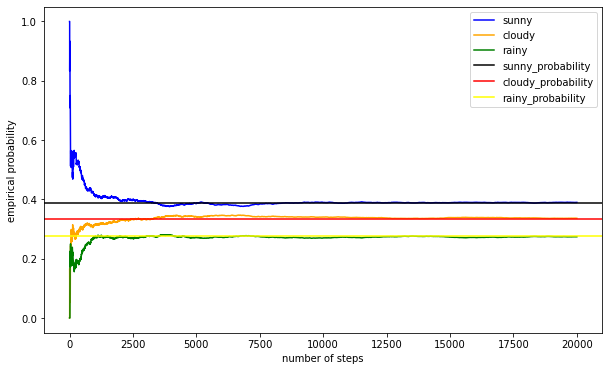

In [249]:
X = np.array([i for i in range(20000)], dtype = "int")

plt.figure(figsize=(10, 6))

plt.plot(X, sunny, c = "blue", label = "sunny")
plt.plot(X, cloudy, c = "orange", label = "cloudy")
plt.plot(X, rainy, c = "green", label = "rainy")
plt.axhline(Pi[0], c = 'black', label = "sunny_probability")
plt.axhline(Pi[1], c = 'red', label = "cloudy_probability")
plt.axhline(Pi[2], c = 'yellow', label = "rainy_probability")
plt.legend(loc = 'upper right')
plt.xlabel("number of steps")
plt.ylabel("empirical probability")
plt.show()

**Задание 4.** Примените алгоритм Metropolis для генерации выборки из смеси двух гауссиан. Плотность смеси задается в виде 
p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

In [274]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.

    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

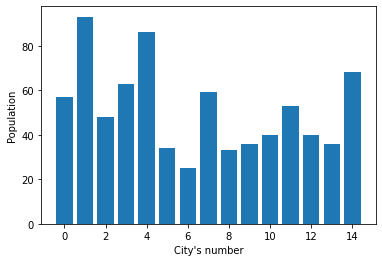

In [252]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)
cities = np.random.randint(10, 100, 15)

plt.bar(np.arange(len(cities)), cities)
plt.xlabel('City\'s number')
plt.ylabel('Population')
plt.show()

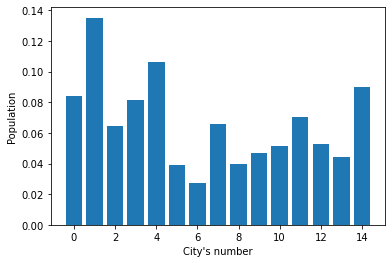

In [253]:
value = lambda x: cities[x]
proposal = lambda x: (x + np.random.choice([-1, 1])) % len(cities)
post = metroplis(1, value, proposal, 10000)

plt.hist(post, bins=np.arange(len(cities) + 1) - 0.5, rwidth=0.8, density=True)
plt.xlabel('City\'s number')
plt.ylabel('Population')
plt.show()

In [334]:
import scipy.stats as sps
from math import sqrt
def N(M, D, x):
    return 1/(sqrt(2*D*np.pi))*np.exp(-(x-M)**2/(2*D))
def value(point, **kwargs):
    return 0.3*N(-4, 2, point) + 0.7*N(3, 6, point)
def proposal(current, **kwargs):
    result = current + 0.1*np.random.choice([-9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    if (result < -10):
        result = result + 20
    if (current > 10):
        result = result - 20
    return result

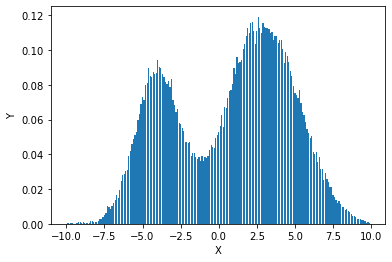

In [337]:
Y = metroplis(0, value, proposal, 100000)
plt.hist(Y, bins = np.arange(201)/10 - 10.05, rwidth = 0.8, density=True)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()